# Data Generation

In [1]:
import numpy as np
from sklearn.model_selection import KFold

In [2]:
x0 = np.random.rand(500) - 0.5
x1 = np.random.rand(500) - 0.5
X = np.array(list(zip(x0, x1)))
y = np.array([1 if i0 * i1 > 0 else 0 for (i0, i1)  in list(zip(x0, x1))])

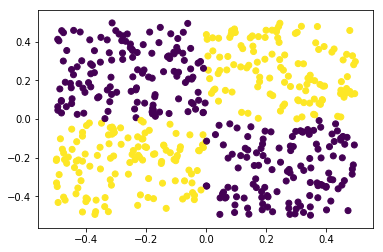

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)

# Feature Extraction with KNN

In [4]:
def _distance(a, b):
    return np.linalg.norm(b-a)

def _get_feat(data, y, class_index, K):
    in_class_X = X[y == class_index]
    distances = np.array([_distance(a, data) for a in in_class_X  if all(a != data)])
    sorted_distances_index = np.argsort(distances)
    nearest_index = list(sorted_distances_index[0: K])
    dist = np.sum(distances[nearest_index])
    return dist

In [5]:
def knnExtract(X, y, K=1):
    CLASS_NUM = len(set(y))
    
#     kf = KFold(n_splits=2)
#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
        
    features = np.empty([0, len(X)])
    for class_index in range(CLASS_NUM):
        feat = np.array([np.apply_along_axis(_get_feat, 1, X, y, class_index, K)])
        features = np.append(features, feat, axis=0)
    features = features.T
    return features

In [6]:
newX = knnExtract(X, y, K=1)

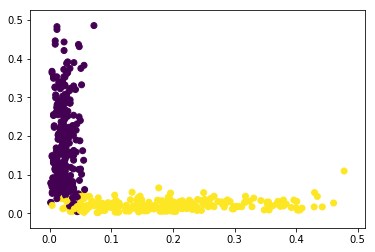

In [7]:
plt.scatter(newX[:,0], newX[:,1], c=y)